In [5]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score,classification_report
import joblib

In [20]:
df = pd.read_csv("Amazon.csv")
print(df.head())
print(df.describe())

   Unnamed: 0                                             review  polarity  \
0        3870                            able play youtube alexa    0.5000   
1          62  able recognize indian accent really well drop ...    0.2794   
2         487  absolute smart device amazon connect external ...    0.1827   
3        3204  absolutely amaze new member family control hom...    0.3682   
4        1265  absolutely amaze previously sceptical invest m...    0.2333   

   division  
0  positive  
1  positive  
2  positive  
3  positive  
4  positive  
        Unnamed: 0     polarity
count  4084.000000  4084.000000
mean   2070.871205     0.350653
std    1203.976943     0.367858
min       0.000000    -1.000000
25%    1024.750000     0.006725
50%    2061.500000     0.383300
75%    3119.250000     0.607100
max    4156.000000     1.000000


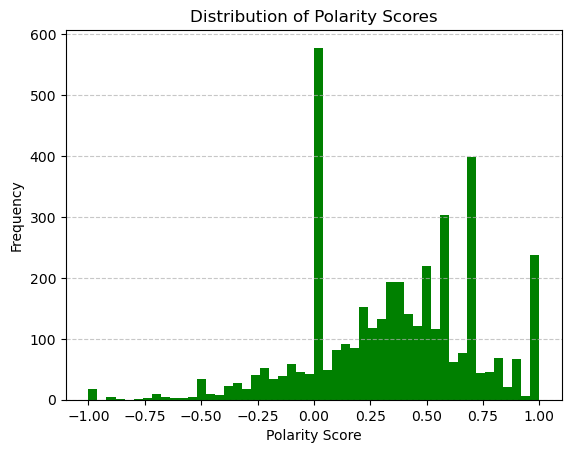

In [13]:
plt.hist(df['polarity'],color='green',bins=50)
plt.xlabel("Polarity Score")
plt.ylabel("Frequency")
plt.title("Distribution of Polarity Scores")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

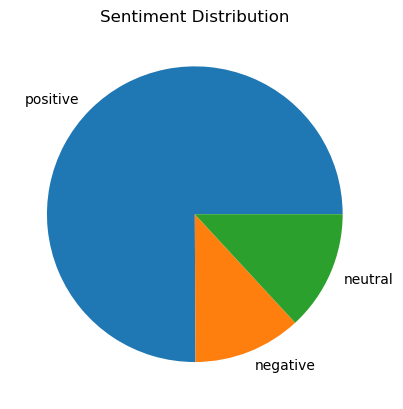

In [14]:
sentiments = ['positive', 'negative', 'neutral']
counts = []
for sentiment in sentiments:
  counts.append(df['division'].value_counts()[sentiment])
plt.pie(counts, labels=sentiments)
plt.title('Sentiment Distribution')
plt.show()



## TF-IDF Matrix

In [21]:
# init vectorizer
vectorizer = TfidfVectorizer()

# a sparse matrix which is a result of applying fit_transform()
tfidf_matrix = vectorizer.fit_transform(df['review'])
print(tfidf_matrix)

  (0, 145)	0.30454774037519977
  (0, 5130)	0.607512381436296
  (0, 3363)	0.42019426857893794
  (0, 9)	0.6013452892368675
  (1, 3831)	0.13513040331958961
  (1, 1332)	0.10837776340804697
  (1, 3670)	0.2011642689511129
  (1, 3194)	0.21875037921233279
  (1, 4718)	0.21875037921233279
  (1, 3018)	0.09515684945116638
  (1, 1778)	0.19550280597823927
  (1, 2845)	0.19550280597823927
  (1, 859)	0.305433027161619
  (1, 2552)	0.15909271097428823
  (1, 723)	0.0748102589576078
  (1, 2525)	0.21875037921233279
  (1, 4237)	0.07200667132347935
  (1, 5083)	0.12332348892957042
  (1, 957)	0.16163196784046416
  (1, 3995)	0.20846316417597158
  (1, 5048)	0.08413510600513367
  (1, 3976)	0.16762948068065822
  (1, 3379)	0.1320378887248381
  (1, 4145)	0.09283609242760023
  (1, 3008)	0.1908770539147517
  :	:
  (4081, 3711)	0.23274302604255612
  (4081, 5130)	0.24870094750276062
  (4082, 973)	0.36407372702368257
  (4082, 670)	0.36407372702368257
  (4082, 223)	0.36407372702368257
  (4082, 3571)	0.36407372702368257
  (

## Converts Sparse Matrix into Dense array

In [22]:
# converts sparse matrix into dense array
tfidf_array = tfidf_matrix.toarray()

print(tfidf_array)

---------
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## TF-IDF Pandas Dataframe

In [ ]:
# create pandas dataframe from the dense array
tfidf = pd.DataFrame(tfidf_array)

print(tfidf)

In [ ]:
df = pd.concat([df,tfidf], axis = 1)
df = df.drop(columns=['Unnamed: 0', 'polarity', 'review'])

In [7]:
joblib.dump(vectorizer, "vectorizer.joblib")


['/usercode/vectorizer.joblib']

In [8]:
df = df.replace(['negative', 'neutral', 'positive'], [-1,0,1])
df.columns = df.columns.astype(str)
X = df.drop(columns=['division'])
Y = df['division']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [9]:
classifier = MLPClassifier(hidden_layer_sizes=(100,50), solver='lbfgs', alpha=1e-5, random_state=1,max_iter=2000)

In [10]:
classifier.fit(X_train, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(100, 50), max_iter=2000,
              random_state=1, solver='lbfgs')

In [14]:
y_pred = classifier.predict(X_test)
report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

In [16]:
filePath = "model.pkl"

joblib.dump(classifier, filePath)

['/usercode/model.pkl']